Device in use: cuda
Loading datasets...
Training set size: 136, Test set size: 34

### Baseline CNN Training ###
Baseline Epoch 01/5 | Train Loss: 0.7053, Train Acc: 0.4118 | Test  Loss: 0.6917, Test  Acc: 0.7059
Baseline Epoch 02/5 | Train Loss: 0.6924, Train Acc: 0.5074 | Test  Loss: 0.6899, Test  Acc: 0.5000
Baseline Epoch 03/5 | Train Loss: 0.6799, Train Acc: 0.5809 | Test  Loss: 0.6854, Test  Acc: 0.6471
Baseline Epoch 04/5 | Train Loss: 0.6784, Train Acc: 0.5662 | Test  Loss: 0.6788, Test  Acc: 0.7059
Baseline Epoch 05/5 | Train Loss: 0.6667, Train Acc: 0.6324 | Test  Loss: 0.6722, Test  Acc: 0.6176
Baseline training and evaluation complete.

Plotting baseline learning curves...


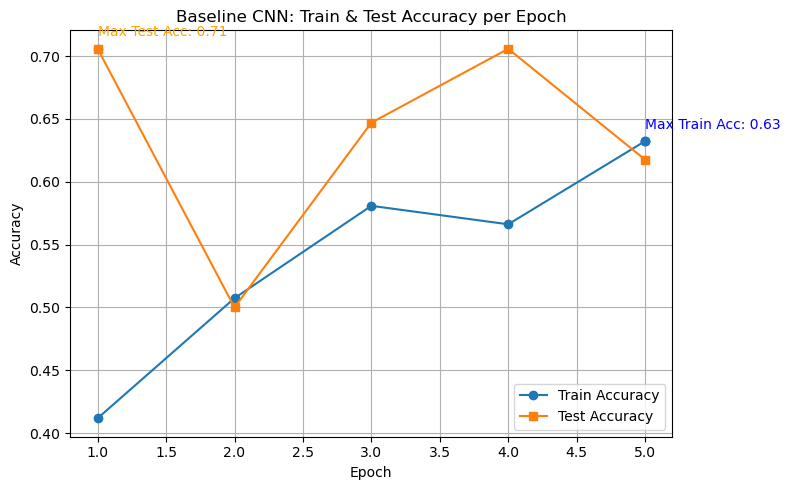

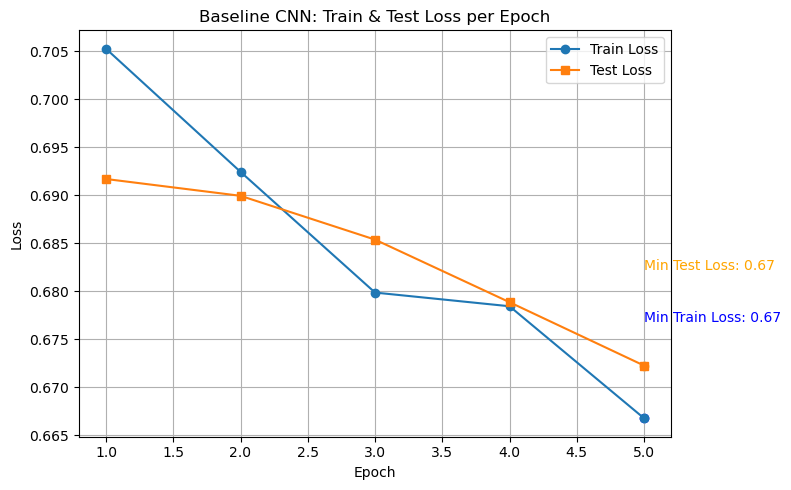


### Starting RANDOM Search hyperparameter tuning ###
Starting RANDOM Search...


[I 2025-06-04 13:12:14,020] Using an existing study with name 'random_search' instead of creating a new one.


Trial 8: lr=2.51e-03, dropout=0.22, optimizer=SGD, batch_size=32, num_filters=48
  Trial 8 • Fold 1 Epoch 5/5
  Trial 8 Fold 1 results -> Acc: 0.5000, Loss: 0.6931
  Trial 8 • Fold 2 Epoch 5/5
  Trial 8 Fold 2 results -> Acc: 0.4815, Loss: 0.6943
  Trial 8 • Fold 3 Epoch 5/5
  Trial 8 Fold 3 results -> Acc: 0.4815, Loss: 0.6951
  Trial 8 • Fold 4 Epoch 5/5
  Trial 8 Fold 4 results -> Acc: 0.5185, Loss: 0.6919
  Trial 8 • Fold 5 Epoch 5/5


[I 2025-06-04 13:28:37,942] Trial 8 finished with value: 0.4925925925925926 and parameters: {'lr': 0.0025070879191358337, 'dropout': 0.22481859429493908, 'optimizer': 'SGD', 'batch_size': 32, 'num_filters': 48}. Best is trial 3 with value: 0.6896825396825397.


  Trial 8 Fold 5 results -> Acc: 0.4815, Loss: 0.6947
Trial 8 mean CV Acc: 0.4926, mean CV Loss: 0.6938

Trial 9: lr=1.14e-03, dropout=0.32, optimizer=Adam, batch_size=16, num_filters=48
  Trial 9 • Fold 1 Epoch 5/5
  Trial 9 Fold 1 results -> Acc: 0.8571, Loss: 0.6041
  Trial 9 • Fold 2 Epoch 5/5
  Trial 9 Fold 2 results -> Acc: 0.8148, Loss: 0.5629
  Trial 9 • Fold 3 Epoch 5/5
  Trial 9 Fold 3 results -> Acc: 0.5185, Loss: 0.6502
  Trial 9 • Fold 4 Epoch 5/5
  Trial 9 Fold 4 results -> Acc: 0.7778, Loss: 0.6709
  Trial 9 • Fold 5 Epoch 5/5


[I 2025-06-04 13:44:18,665] Trial 9 finished with value: 0.7492063492063491 and parameters: {'lr': 0.001139915777295464, 'dropout': 0.3210423381574604, 'optimizer': 'Adam', 'batch_size': 16, 'num_filters': 48}. Best is trial 9 with value: 0.7492063492063491.


  Trial 9 Fold 5 results -> Acc: 0.7778, Loss: 0.6322
Trial 9 mean CV Acc: 0.7492, mean CV Loss: 0.6240

Trial 10: lr=1.91e-04, dropout=0.36, optimizer=SGD, batch_size=16, num_filters=32


[W 2025-06-04 13:45:12,822] Trial 10 failed with parameters: {'lr': 0.00019111435807991434, 'dropout': 0.36047362604920863, 'optimizer': 'SGD', 'batch_size': 16, 'num_filters': 32} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\flori\AppData\Roaming\Python\Python312\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\flori\AppData\Local\Temp\ipykernel_13224\2879896408.py", line 352, in objective
    train_one_epoch(model, train_loader, criterion, optimizer, DEVICE)
  File "C:\Users\flori\AppData\Local\Temp\ipykernel_13224\2879896408.py", line 110, in train_one_epoch
    for inputs, labels in loader:
                          ^^^^^^
  File "C:\Users\flori\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py", line 733, in __next__
    data = self._next_data()
           ^^^^^^^^^^^^^^^^^
  File "C:\Users\flo

KeyboardInterrupt: 

In [3]:
# Cell 1: Run baseline + a single hyperparameter search ("random" or "TPE") with persistent storage

# -----------------------------
#        INPUT PARAMETERS
# -----------------------------
# Choose one of: "random" or "TPE"
SEARCH_METHOD = "random"

# Random seed
SEED = 18

# DataLoader settings
NUM_WORKERS = 4
PIN_MEMORY = True

# Baseline CNN settings
BATCH_SIZE_BASELINE = 16
NUM_EPOCHS_BASELINE = 5
LR_BASELINE = 0.001

# Cross-Validation (CV) settings
CV_FOLDS = 5
CV_EPOCHS = 5

# Optuna hyperparameter tuning settings
OPTUNA_TRIALS = 5

# Persistent storage URL (SQLite) for saving trials
STORAGE_URL = "sqlite:///hparam_results.db"

# Final model training settings (not used in Cell 1, but needed for Cell 2)
NUM_EPOCHS_FINAL = 5
BATCH_SIZE_TEST = 16  # For test DataLoader

# Other constants
import torch
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
VAL_CURVES_FILENAME = "validation_curves.png"
VAL_LOSS_CURVES_FILENAME = "validation_loss_curves.png"
BASELINE_ACC_CURVE_FILENAME = "baseline_accuracy_curve.png"
BASELINE_LOSS_CURVE_FILENAME = "baseline_loss_curve.png"
RANDOM_MODEL_FILENAME = "cnn_random_search_best.pth"
TPE_MODEL_FILENAME = "cnn_tpe_search_best.pth"
# -----------------------------
#        END PARAMETERS
# -----------------------------

import random
import optuna
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from support import load_dataset
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedKFold
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

# Set seed for reproducibility
def set_seed(seed: int = SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed()

print(f"Device in use: {DEVICE}")
print("Loading datasets...")
train_dataset, test_dataset = load_dataset()
print(f"Training set size: {len(train_dataset)}, Test set size: {len(test_dataset)}")

# Define CNN
class CNN(nn.Module):
    def __init__(self, num_filters: int = 16, dropout: float = 0.5):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, num_filters, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(num_filters, num_filters * 2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        with torch.no_grad():
            dummy = torch.zeros(1, 3, 60, 30)
            out = self.features(dummy)
            flat_size = out.view(1, -1).shape[1]
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flat_size, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 2)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Training / evaluation helpers
def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = correct / len(loader.dataset)
    return epoch_loss, epoch_acc

def evaluate(model, loader, device):
    model.eval()
    correct = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
    return correct / len(loader.dataset)

def evaluate_loss(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    count = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            count += inputs.size(0)
    return total_loss / count

# ----------------------------------------------------------------------------------
# 1) Train baseline CNN with test evaluation and plot learning curves
# ----------------------------------------------------------------------------------
print("\n### Baseline CNN Training ###")
baseline_train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE_BASELINE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY
)
baseline_test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE_BASELINE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY
)
baseline_model = CNN(num_filters=16, dropout=0.5).to(DEVICE)
criterion_baseline = nn.CrossEntropyLoss()
optimizer_baseline = optim.Adam(baseline_model.parameters(), lr=LR_BASELINE)

baseline_train_accs = []
baseline_train_losses = []
baseline_test_accs = []
baseline_test_losses = []

for epoch in range(1, NUM_EPOCHS_BASELINE + 1):
    train_loss, train_acc = train_one_epoch(
        baseline_model,
        baseline_train_loader,
        criterion_baseline,
        optimizer_baseline,
        DEVICE
    )
    test_loss = evaluate_loss(
        baseline_model,
        baseline_test_loader,
        criterion_baseline,
        DEVICE
    )
    test_acc = evaluate(
        baseline_model,
        baseline_test_loader,
        DEVICE
    )

    baseline_train_losses.append(train_loss)
    baseline_train_accs.append(train_acc)
    baseline_test_losses.append(test_loss)
    baseline_test_accs.append(test_acc)

    print(
        f"Baseline Epoch {epoch:02d}/{NUM_EPOCHS_BASELINE} | "
        f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
        f"Test  Loss: {test_loss:.4f}, Test  Acc: {test_acc:.4f}"
    )
print("Baseline training and evaluation complete.\n")

# Plot baseline learning curves
def plot_learning_curves(
    epochs,
    train_accs,
    test_accs,
    train_losses,
    test_losses,
    acc_title: str,
    loss_title: str,
    acc_filename: str,
    loss_filename: str
):
    # Accuracy plot
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_accs, marker='o', label="Train Accuracy")
    plt.plot(epochs, test_accs, marker='s', label="Test Accuracy")
    # Highlight maxima
    if train_accs:
        best_train_idx = int(np.argmax(train_accs))
        best_train_val = max(train_accs)
        plt.scatter(epochs[best_train_idx], best_train_val, color='blue')
        plt.text(
            epochs[best_train_idx],
            best_train_val + 0.01,
            f"Max Train Acc: {best_train_val:.2f}",
            color='blue'
        )
    if test_accs:
        best_test_idx = int(np.argmax(test_accs))
        best_test_val = max(test_accs)
        plt.scatter(epochs[best_test_idx], best_test_val, color='orange')
        plt.text(
            epochs[best_test_idx],
            best_test_val + 0.01,
            f"Max Test Acc: {best_test_val:.2f}",
            color='orange'
        )
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(acc_title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(acc_filename, dpi=300)
    plt.show()

    # Loss plot
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, marker='o', label="Train Loss")
    plt.plot(epochs, test_losses, marker='s', label="Test Loss")
    # Highlight minima
    if train_losses:
        best_train_loss_idx = int(np.argmin(train_losses))
        best_train_loss_val = min(train_losses)
        plt.scatter(epochs[best_train_loss_idx], best_train_loss_val, color='blue')
        plt.text(
            epochs[best_train_loss_idx],
            best_train_loss_val + 0.01,
            f"Min Train Loss: {best_train_loss_val:.2f}",
            color='blue'
        )
    if test_losses:
        best_test_loss_idx = int(np.argmin(test_losses))
        best_test_loss_val = min(test_losses)
        plt.scatter(epochs[best_test_loss_idx], best_test_loss_val, color='orange')
        plt.text(
            epochs[best_test_loss_idx],
            best_test_loss_val + 0.01,
            f"Min Test Loss: {best_test_loss_val:.2f}",
            color='orange'
        )
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(loss_title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(loss_filename, dpi=300)
    plt.show()

epochs_baseline = np.arange(1, NUM_EPOCHS_BASELINE + 1)
print("Plotting baseline learning curves...")
plot_learning_curves(
    epochs=epochs_baseline,
    train_accs=baseline_train_accs,
    test_accs=baseline_test_accs,
    train_losses=baseline_train_losses,
    test_losses=baseline_test_losses,
    acc_title="Baseline CNN: Train & Test Accuracy per Epoch",
    loss_title="Baseline CNN: Train & Test Loss per Epoch",
    acc_filename=BASELINE_ACC_CURVE_FILENAME,
    loss_filename=BASELINE_LOSS_CURVE_FILENAME
)

# ----------------------------------------------------------------------------------
# 3) Hyperparameter tuning with Optuna (only one study, based on SEARCH_METHOD)
# ----------------------------------------------------------------------------------
print(f"\n### Starting {SEARCH_METHOD.upper()} Search hyperparameter tuning ###")
labels_list = [int(train_dataset[i][1]) for i in range(len(train_dataset))]
all_indices = list(range(len(train_dataset)))

def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.7)
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD"])
    batch_size = trial.suggest_categorical("batch_size", [16, 32])
    num_filters = trial.suggest_int("num_filters", 16, 64, step=16)

    print(
        f"Trial {trial.number}: lr={lr:.2e}, dropout={dropout:.2f}, optimizer={optimizer_name}, "
        f"batch_size={batch_size}, num_filters={num_filters}"
    )

    skf = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=SEED)
    fold_accuracies = []
    fold_losses = []

    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(all_indices, labels_list), start=1):
        train_sub = Subset(train_dataset, train_idx)
        val_sub   = Subset(train_dataset, val_idx)

        train_loader = DataLoader(
            train_sub,
            batch_size=batch_size,
            shuffle=True,
            num_workers=NUM_WORKERS,
            pin_memory=PIN_MEMORY
        )
        val_loader = DataLoader(
            val_sub,
            batch_size=batch_size,
            shuffle=False,
            num_workers=NUM_WORKERS,
            pin_memory=PIN_MEMORY
        )

        model = CNN(num_filters=num_filters, dropout=dropout).to(DEVICE)
        criterion = nn.CrossEntropyLoss()
        optimizer = (
            optim.Adam(model.parameters(), lr=lr)
            if optimizer_name == "Adam"
            else optim.SGD(model.parameters(), lr=lr)
        )

        for epoch in range(1, CV_EPOCHS + 1):
            train_one_epoch(model, train_loader, criterion, optimizer, DEVICE)
            if epoch % 5 == 0 or epoch == CV_EPOCHS:
                print(f"  Trial {trial.number} • Fold {fold_idx} Epoch {epoch}/{CV_EPOCHS}")

        # Compute CV loss and accuracy
        total_loss = 0.0
        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_loss += loss.item() * inputs.size(0)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                total += inputs.size(0)
        mean_loss_fold = total_loss / total
        acc_fold = correct / total

        print(
            f"  Trial {trial.number} Fold {fold_idx} results -> "
            f"Acc: {acc_fold:.4f}, Loss: {mean_loss_fold:.4f}"
        )

        fold_losses.append(mean_loss_fold)
        fold_accuracies.append(acc_fold)

    mean_cv_acc  = float(np.mean(fold_accuracies))
    mean_cv_loss = float(np.mean(fold_losses))
    trial.set_user_attr("mean_cv_loss", mean_cv_loss)
    print(
        f"Trial {trial.number} mean CV Acc: {mean_cv_acc:.4f}, "
        f"mean CV Loss: {mean_cv_loss:.4f}\n"
    )
    return mean_cv_acc

# Decide which sampler to use based on SEARCH_METHOD
if SEARCH_METHOD.lower() == "random":
    sampler = optuna.samplers.RandomSampler()
    study_name = "random_search"
elif SEARCH_METHOD.lower() == "tpe":
    sampler = optuna.samplers.TPESampler()
    study_name = "tpe_search"
else:
    raise ValueError("SEARCH_METHOD must be either 'random' or 'TPE'")

print(f"Starting {SEARCH_METHOD.upper()} Search...")
study = optuna.create_study(
    study_name=study_name,
    storage=STORAGE_URL,
    load_if_exists=True,
    direction="maximize",
    sampler=sampler
)
study.optimize(objective, n_trials=OPTUNA_TRIALS)

best_trial = study.best_trial
best_params = best_trial.params
best_cv_acc = best_trial.value
best_cv_loss = best_trial.user_attrs.get("mean_cv_loss", float("nan"))

print(
    f"\n{SEARCH_METHOD.upper()} Search best trial #{best_trial.number} | "
    f"Hyperparams: {best_params} | CV Acc: {best_cv_acc:.4f} | CV Loss: {best_cv_loss:.4f}"
)

Loading the saved study from disk…

RANDOM Search trial summary:
  Trial # 0 | Params={'lr': 0.004187903186122183, 'dropout': 0.3655175530218532, 'optimizer': 'SGD', 'batch_size': 16, 'num_filters': 32} | CV Acc=N/A | CV Loss=N/A
  Trial # 1 | Params={'lr': 0.00788192338071807, 'dropout': 0.41172972278612774, 'optimizer': 'SGD', 'batch_size': 16, 'num_filters': 16} | CV Acc=N/A | CV Loss=N/A
  Trial # 2 | Params={'lr': 0.002782082381107915, 'dropout': 0.6319009578217486, 'optimizer': 'SGD', 'batch_size': 16, 'num_filters': 32} | CV Acc=0.5 | CV Loss=0.6928005957729602
  Trial # 3 | Params={'lr': 0.0010764334884126115, 'dropout': 0.4864129477171596, 'optimizer': 'Adam', 'batch_size': 16, 'num_filters': 16} | CV Acc=0.6896825396825397 | CV Loss=0.6593968047666802
  Trial # 4 | Params={'lr': 3.852238266840861e-05, 'dropout': 0.20485068262740005, 'optimizer': 'Adam', 'batch_size': 32, 'num_filters': 64} | CV Acc=0.6695767195767196 | CV Loss=0.6891204237937927
  Trial # 5 | Params={'lr': 0.

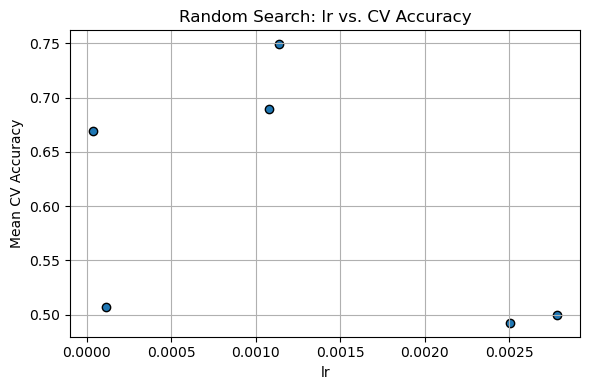

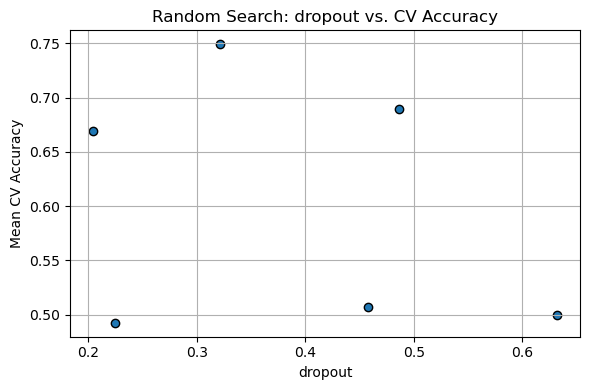

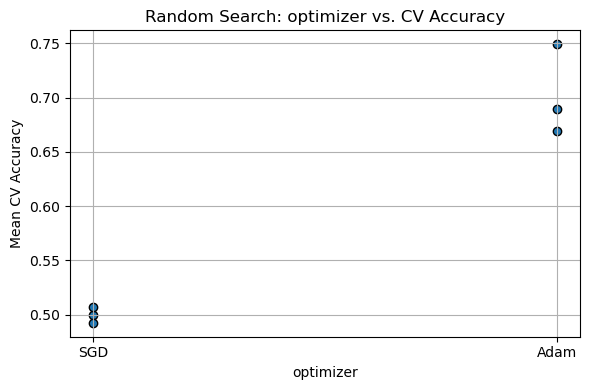

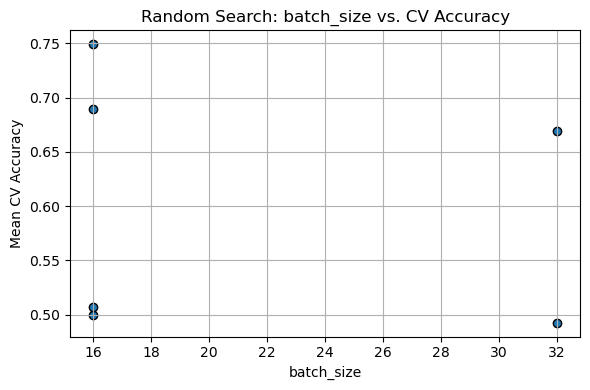

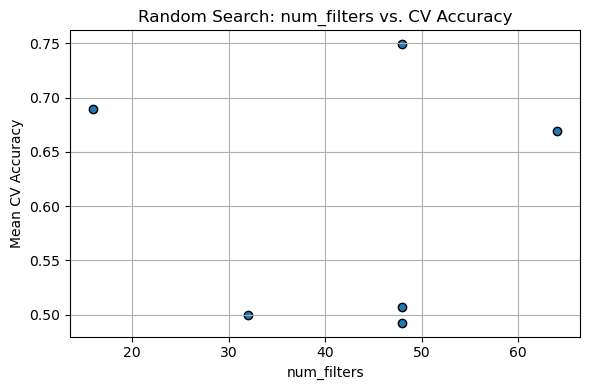


Plotting validation accuracy curve…


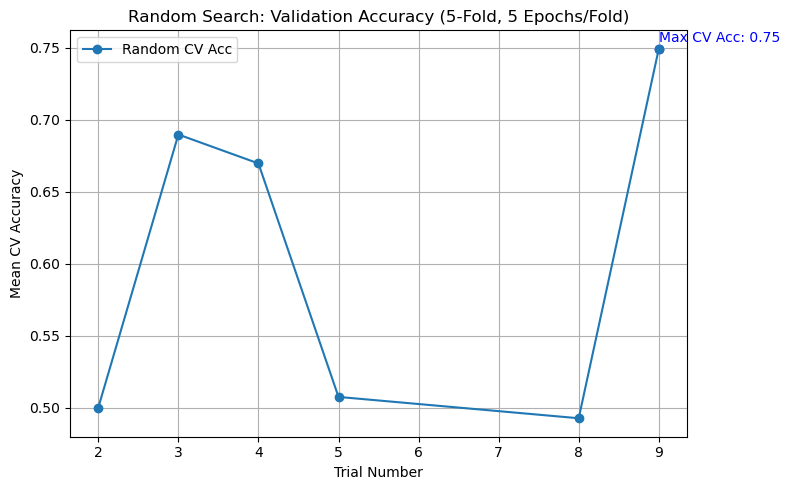


Plotting validation loss curve…


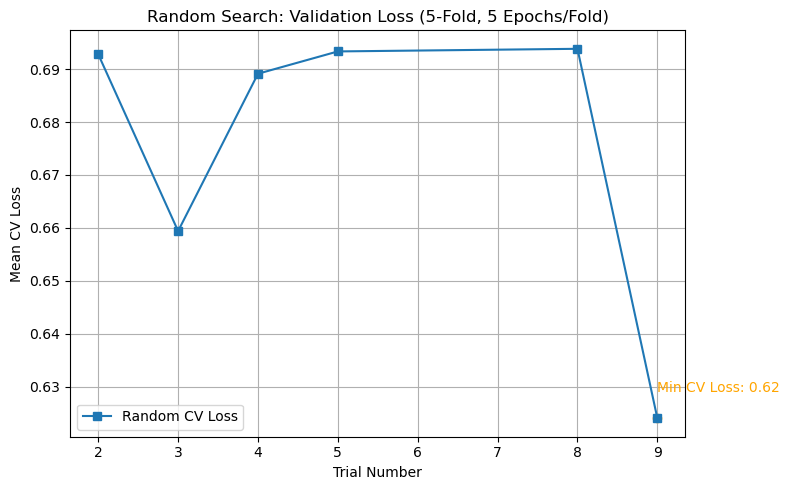


Best‐so‐far RANDOM trial #9 | Hyperparams: {'lr': 0.001139915777295464, 'dropout': 0.3210423381574604, 'optimizer': 'Adam', 'batch_size': 16, 'num_filters': 48} | CV Acc: 0.7492 | CV Loss: 0.6240
Training Random‐best model on full training set…
Epoch 01/5 | Train Loss: 0.7041, Train Acc: 0.5441 | Test  Loss: 0.7006, Test  Acc: 0.5000
Epoch 02/5 | Train Loss: 0.7017, Train Acc: 0.4265 | Test  Loss: 0.6918, Test  Acc: 0.5000
Epoch 03/5 | Train Loss: 0.6913, Train Acc: 0.4779 | Test  Loss: 0.6898, Test  Acc: 0.7059
Epoch 04/5 | Train Loss: 0.6884, Train Acc: 0.5368 | Test  Loss: 0.6870, Test  Acc: 0.7059
Epoch 05/5 | Train Loss: 0.6814, Train Acc: 0.6397 | Test  Loss: 0.6788, Test  Acc: 0.7353
Plotting learning curves for the best‐so‐far model…


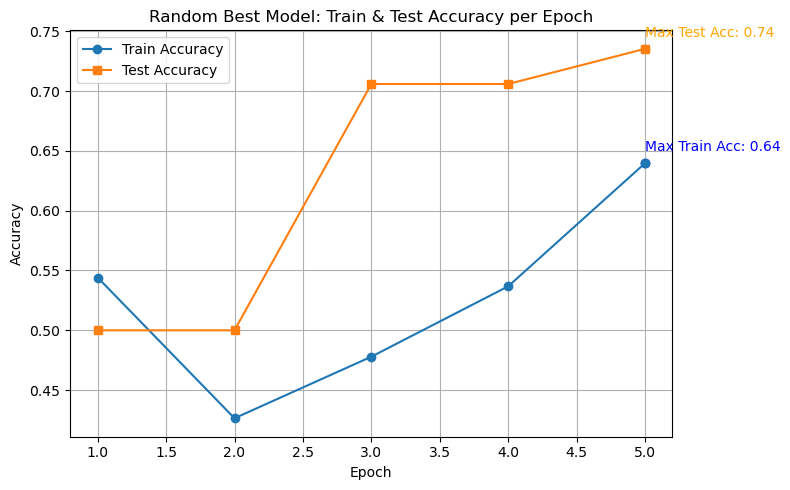

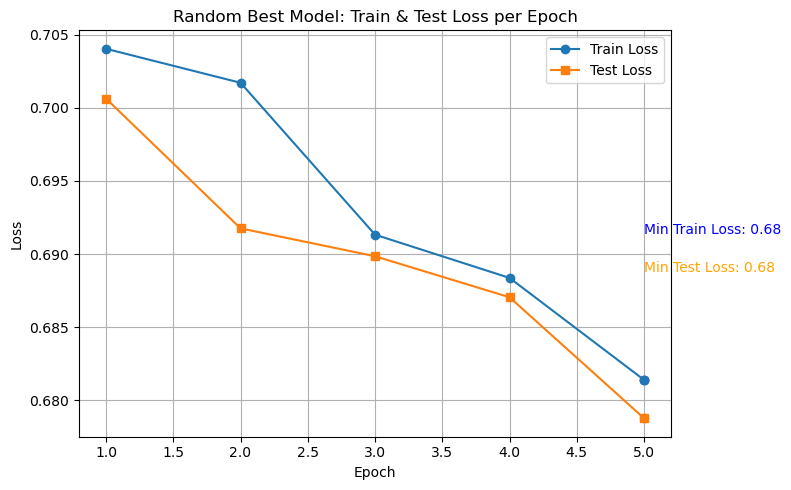

In [4]:
# Cell 2: Plot validation curves & train best‐so‐far model on full data
# (Loads only the chosen study, handles missing trials, plus scatter‐plots)

import optuna
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedKFold

# -----------------------------
# Re‐define the constants from Cell 1 that Cell 2 relies on:
# -----------------------------
SEARCH_METHOD = "random"   # or "TPE" — must match Cell 1
SEED = 18

NUM_WORKERS      = 4
PIN_MEMORY       = True
CV_FOLDS         = 5
CV_EPOCHS        = 5
NUM_EPOCHS_FINAL = 5
BATCH_SIZE_TEST  = 16

VAL_CURVES_FILENAME      = "validation_curves.png"
VAL_LOSS_CURVES_FILENAME = "validation_loss_curves.png"

# Make sure you’ve already run Cell 1 once so that:
#   - train_dataset, test_dataset are defined
#   - CNN class is defined
#   - STORAGE_URL is the same as in Cell 1
#   - train_full_model, plot_learning_curves are defined (or re‐copied here)

# -----------------------------
# 1) Re‐define any helpers from Cell 1 that Cell 2 needs:
# -----------------------------
def train_full_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs: int):
    train_accs = []
    train_losses = []
    test_accs = []
    test_losses = []
    for epoch in range(1, num_epochs + 1):
        # Train one epoch
        model.train()
        running_loss = 0.0
        correct = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
        train_loss = running_loss / len(train_loader.dataset)
        train_acc  = correct / len(train_loader.dataset)

        # Evaluate on test set for both loss and accuracy
        model.eval()
        total_loss = 0.0
        correct = 0
        count = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_loss += loss.item() * inputs.size(0)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                count += inputs.size(0)
        test_loss = total_loss / count
        test_acc  = correct / count

        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        print(
            f"Epoch {epoch:02d}/{num_epochs} | "
            f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
            f"Test  Loss: {test_loss:.4f}, Test  Acc: {test_acc:.4f}"
        )

    return train_losses, train_accs, test_losses, test_accs

def plot_learning_curves(
    epochs,
    train_accs,
    test_accs,
    train_losses,
    test_losses,
    acc_title: str,
    loss_title: str,
    acc_filename: str,
    loss_filename: str
):
    # Accuracy plot
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_accs, marker='o', label="Train Accuracy")
    plt.plot(epochs, test_accs, marker='s', label="Test Accuracy")
    # Highlight maxima if available
    if train_accs:
        best_train_idx = int(np.argmax(train_accs))
        best_train_val = max(train_accs)
        plt.scatter(epochs[best_train_idx], best_train_val, color='blue')
        plt.text(
            epochs[best_train_idx],
            best_train_val + 0.01,
            f"Max Train Acc: {best_train_val:.2f}",
            color='blue'
        )
    if test_accs:
        best_test_idx = int(np.argmax(test_accs))
        best_test_val = max(test_accs)
        plt.scatter(epochs[best_test_idx], best_test_val, color='orange')
        plt.text(
            epochs[best_test_idx],
            best_test_val + 0.01,
            f"Max Test Acc: {best_test_val:.2f}",
            color='orange'
        )
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(acc_title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(acc_filename, dpi=300)
    plt.show()

    # Loss plot
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, marker='o', label="Train Loss")
    plt.plot(epochs, test_losses, marker='s', label="Test Loss")
    # Highlight minima if available
    if train_losses:
        best_train_loss_idx = int(np.argmin(train_losses))
        best_train_loss_val = min(train_losses)
        plt.scatter(epochs[best_train_loss_idx], best_train_loss_val, color='blue')
        plt.text(
            epochs[best_train_loss_idx],
            best_train_loss_val + 0.01,
            f"Min Train Loss: {best_train_loss_val:.2f}",
            color='blue'
        )
    if test_losses:
        best_test_loss_idx = int(np.argmin(test_losses))
        best_test_loss_val = min(test_losses)
        plt.scatter(epochs[best_test_loss_idx], best_test_loss_val, color='orange')
        plt.text(
            epochs[best_test_loss_idx],
            best_test_loss_val + 0.01,
            f"Min Test Loss: {best_test_loss_val:.2f}",
            color='orange'
        )
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(loss_title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(loss_filename, dpi=300)
    plt.show()

# -----------------------------
# 2) Reload the single study from storage, print trial summaries, scatter‐plots, and CV curves
# -----------------------------
print("Loading the saved study from disk…")

study_name = f"{SEARCH_METHOD.lower()}_search"
try:
    study = optuna.load_study(
        study_name=study_name,
        storage="sqlite:///hparam_results.db"
    )
    exists = True
except KeyError:
    print(f"Warning: '{study_name}' study not found. Nothing to plot or retrain.")
    exists = False

if not exists:
    raise SystemExit()

# 2a) Print out all trials with hyperparameters, CV accuracy & CV loss (or "N/A" if missing)
print(f"\n{SEARCH_METHOD.upper()} Search trial summary:")
for t in study.trials:
    params = t.params
    acc    = t.value if t.value is not None else "N/A"
    loss   = t.user_attrs.get("mean_cv_loss", "N/A")
    print(
        f"  Trial #{t.number:2d} | Params={params} | CV Acc={acc} | CV Loss={loss}"
    )

# 2b) Extract only the *completed* trials (value not None) for plotting
valid_trials = [t for t in study.trials if t.value is not None]
trial_nums = [t.number for t in valid_trials]
trial_accs = [t.value  for t in valid_trials]
trial_losses = [t.user_attrs.get("mean_cv_loss", np.nan) for t in valid_trials]

# 2c) Scatter‐plots: each hyperparameter versus CV accuracy
print(f"\nPlotting scatter‐plots of {SEARCH_METHOD.upper()} hyperparameters vs. CV accuracy…")
param_names = list(study.best_params.keys())
for param in param_names:
    x_vals = [t.params[param] for t in valid_trials]
    y_vals = [t.value           for t in valid_trials]
    plt.figure(figsize=(6, 4))
    plt.scatter(x_vals, y_vals, marker='o', edgecolor='k')
    plt.xlabel(param)
    plt.ylabel("Mean CV Accuracy")
    plt.title(f"{SEARCH_METHOD.capitalize()} Search: {param} vs. CV Accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"scatter_{SEARCH_METHOD.lower()}_{param}.png", dpi=300)
    plt.show()

# 2d) Plot validation‐accuracy curve (CV accuracy vs. trial number)
print("\nPlotting validation accuracy curve…")
plt.figure(figsize=(8, 5))
plt.plot(trial_nums, trial_accs, marker='o', label=f"{SEARCH_METHOD.capitalize()} CV Acc")
if trial_accs:
    best_idx = trial_nums[np.argmax(trial_accs)]
    best_val = max(trial_accs)
    plt.scatter(best_idx, best_val, color='blue')
    plt.text(best_idx, best_val + 0.005, f"Max CV Acc: {best_val:.2f}", color='blue')
plt.xlabel("Trial Number")
plt.ylabel("Mean CV Accuracy")
plt.title(f"{SEARCH_METHOD.capitalize()} Search: Validation Accuracy ({CV_FOLDS}-Fold, {CV_EPOCHS} Epochs/Fold)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(VAL_CURVES_FILENAME, dpi=300)
plt.show()

# 2e) Plot validation‐loss curve (CV loss vs. trial number)
print("\nPlotting validation loss curve…")
plt.figure(figsize=(8, 5))
plt.plot(trial_nums, trial_losses, marker='s', label=f"{SEARCH_METHOD.capitalize()} CV Loss")
if trial_losses:
    # Use np.nanargmin to skip any nan
    best_loss_idx = trial_nums[np.nanargmin(trial_losses)]
    best_loss_val = min([v for v in trial_losses if not np.isnan(v)])
    plt.scatter(best_loss_idx, best_loss_val, color='orange')
    plt.text(best_loss_idx, best_loss_val + 0.005, f"Min CV Loss: {best_loss_val:.2f}", color='orange')
plt.xlabel("Trial Number")
plt.ylabel("Mean CV Loss")
plt.title(f"{SEARCH_METHOD.capitalize()} Search: Validation Loss ({CV_FOLDS}-Fold, {CV_EPOCHS} Epochs/Fold)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(VAL_LOSS_CURVES_FILENAME, dpi=300)
plt.show()

# -----------------------------
# 3) Retrain the best‐so‐far trial on full training set and plot its learning curves
# -----------------------------
criterion_final = nn.CrossEntropyLoss()

def build_model_and_optimizer(params):
    model = CNN(num_filters=params["num_filters"], dropout=params["dropout"]).to(DEVICE)
    optimizer = (
        optim.Adam(model.parameters(), lr=params["lr"])
        if params["optimizer"] == "Adam"
        else optim.SGD(model.parameters(), lr=params["lr"])
    )
    return model, optimizer

best_trial = study.best_trial
best_params = best_trial.params
best_cv_acc = best_trial.value
best_cv_loss = best_trial.user_attrs.get("mean_cv_loss", float("nan"))
print(
    f"\nBest‐so‐far {SEARCH_METHOD.upper()} trial #{best_trial.number} | "
    f"Hyperparams: {best_params} | CV Acc: {best_cv_acc:.4f} | CV Loss: {best_cv_loss:.4f}"
)

model_best, opt_best = build_model_and_optimizer(best_params)
train_loader_best = DataLoader(
    train_dataset,
    batch_size=best_params["batch_size"],
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY
)
test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE_TEST,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY
)

print(f"Training {SEARCH_METHOD.capitalize()}‐best model on full training set…")
best_train_losses, best_train_accs, best_test_losses, best_test_accs = train_full_model(
    model_best,
    train_loader_best,
    test_loader,
    criterion_final,
    opt_best,
    DEVICE,
    NUM_EPOCHS_FINAL
)

epochs_final = np.arange(1, NUM_EPOCHS_FINAL + 1)
print("Plotting learning curves for the best‐so‐far model…")
plot_learning_curves(
    epochs=epochs_final,
    train_accs=best_train_accs,
    test_accs=best_test_accs,
    train_losses=best_train_losses,
    test_losses=best_test_losses,
    acc_title=f"{SEARCH_METHOD.capitalize()} Best Model: Train & Test Accuracy per Epoch",
    loss_title=f"{SEARCH_METHOD.capitalize()} Best Model: Train & Test Loss per Epoch",
    acc_filename=f"best_{SEARCH_METHOD.lower()}_learning_curve.png",
    loss_filename=f"best_{SEARCH_METHOD.lower()}_loss_curve.png"
)
